In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(15,5)
plt.rcParams['figure.dpi']=300

In [2]:
df=pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<Axes: >

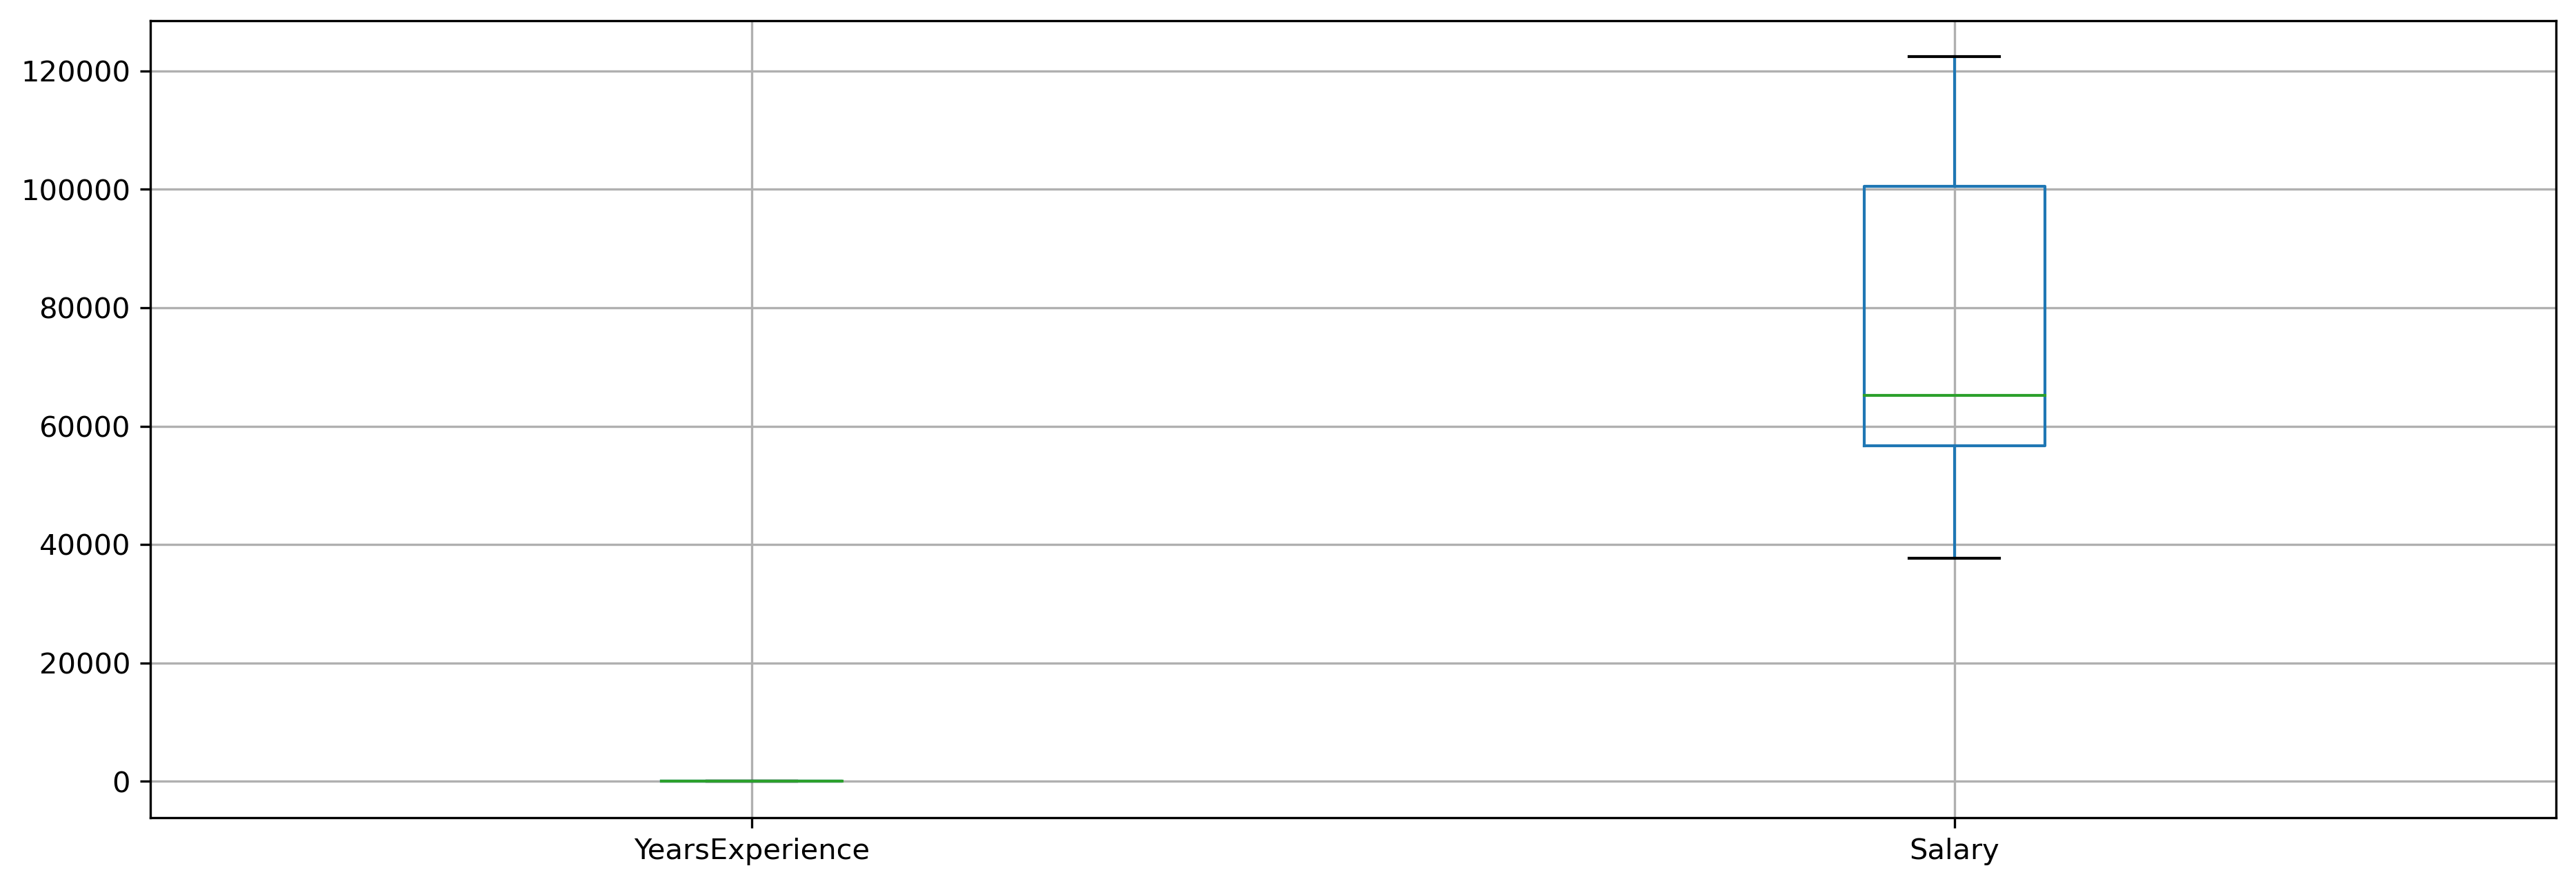

In [4]:
df.boxplot()

In [5]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.rename(columns={'YearsExperience':'YEXP'},inplace=True)

In [8]:
df

,YEXP,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# TRANFARMATION

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc=StandardScaler()


In [11]:
sc.fit_transform(df)

array([[-1.51005294, -1.36011263],
       [-1.43837321, -1.10552744],
       [-1.36669348, -1.419919  ],
       [-1.18749416, -1.20495739],
       [-1.11581443, -1.33978143],
       [-0.86493538, -0.71830716],
       [-0.82909552, -0.58815781],
       [-0.75741579, -0.79981746],
       [-0.75741579, -0.42881019],
       [-0.57821647, -0.69801306],
       [-0.50653674, -0.47433279],
       [-0.47069688, -0.74976858],
       [-0.47069688, -0.70662043],
       [-0.43485702, -0.70201994],
       [-0.29149756, -0.55250402],
       [-0.1481381 , -0.29921736],
       [-0.07645838, -0.37004264],
       [-0.00477865,  0.26285865],
       [ 0.21026054,  0.19885989],
       [ 0.2461004 ,  0.66547573],
       [ 0.53281931,  0.58377993],
       [ 0.6403389 ,  0.82623317],
       [ 0.92705781,  0.93861127],
       [ 1.03457741,  1.40274136],
       [ 1.21377673,  1.24020308],
       [ 1.32129632,  1.09740238],
       [ 1.50049564,  1.51986835],
       [ 1.5363355 ,  1.3590738 ],
       [ 1.78721455,

In [12]:
pd.DataFrame(sc.fit_transform(df),columns=df.columns)


,YEXP,Salary
0,-1.510053,-1.360113
1,-1.438373,-1.105527
2,-1.366693,-1.419919
3,-1.187494,-1.204957
4,-1.115814,-1.339781
5,-0.864935,-0.718307
6,-0.829096,-0.588158
7,-0.757416,-0.799817
8,-0.757416,-0.428810
9,-0.578216,-0.698013


In [13]:
#check linearity

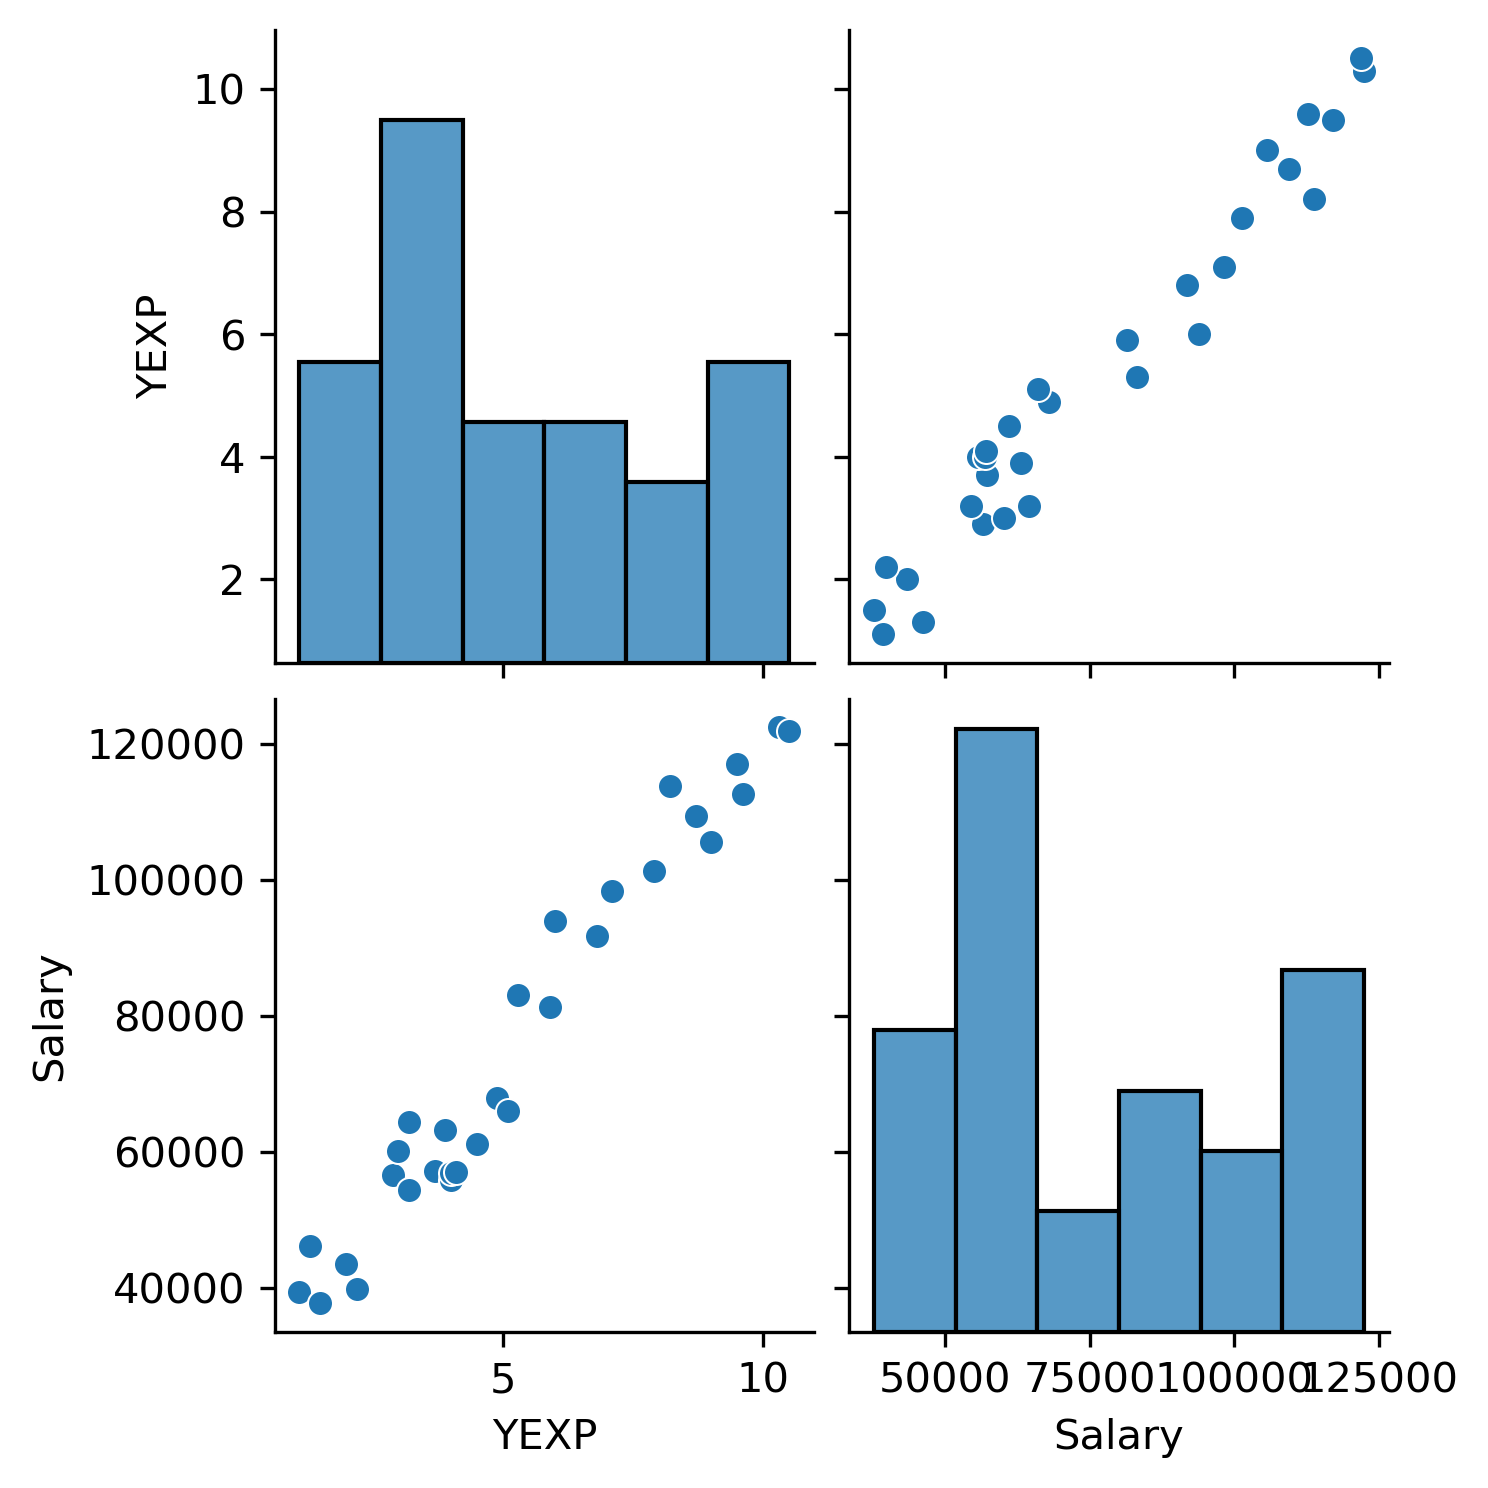

In [14]:
sns.pairplot(df)

<Axes: >

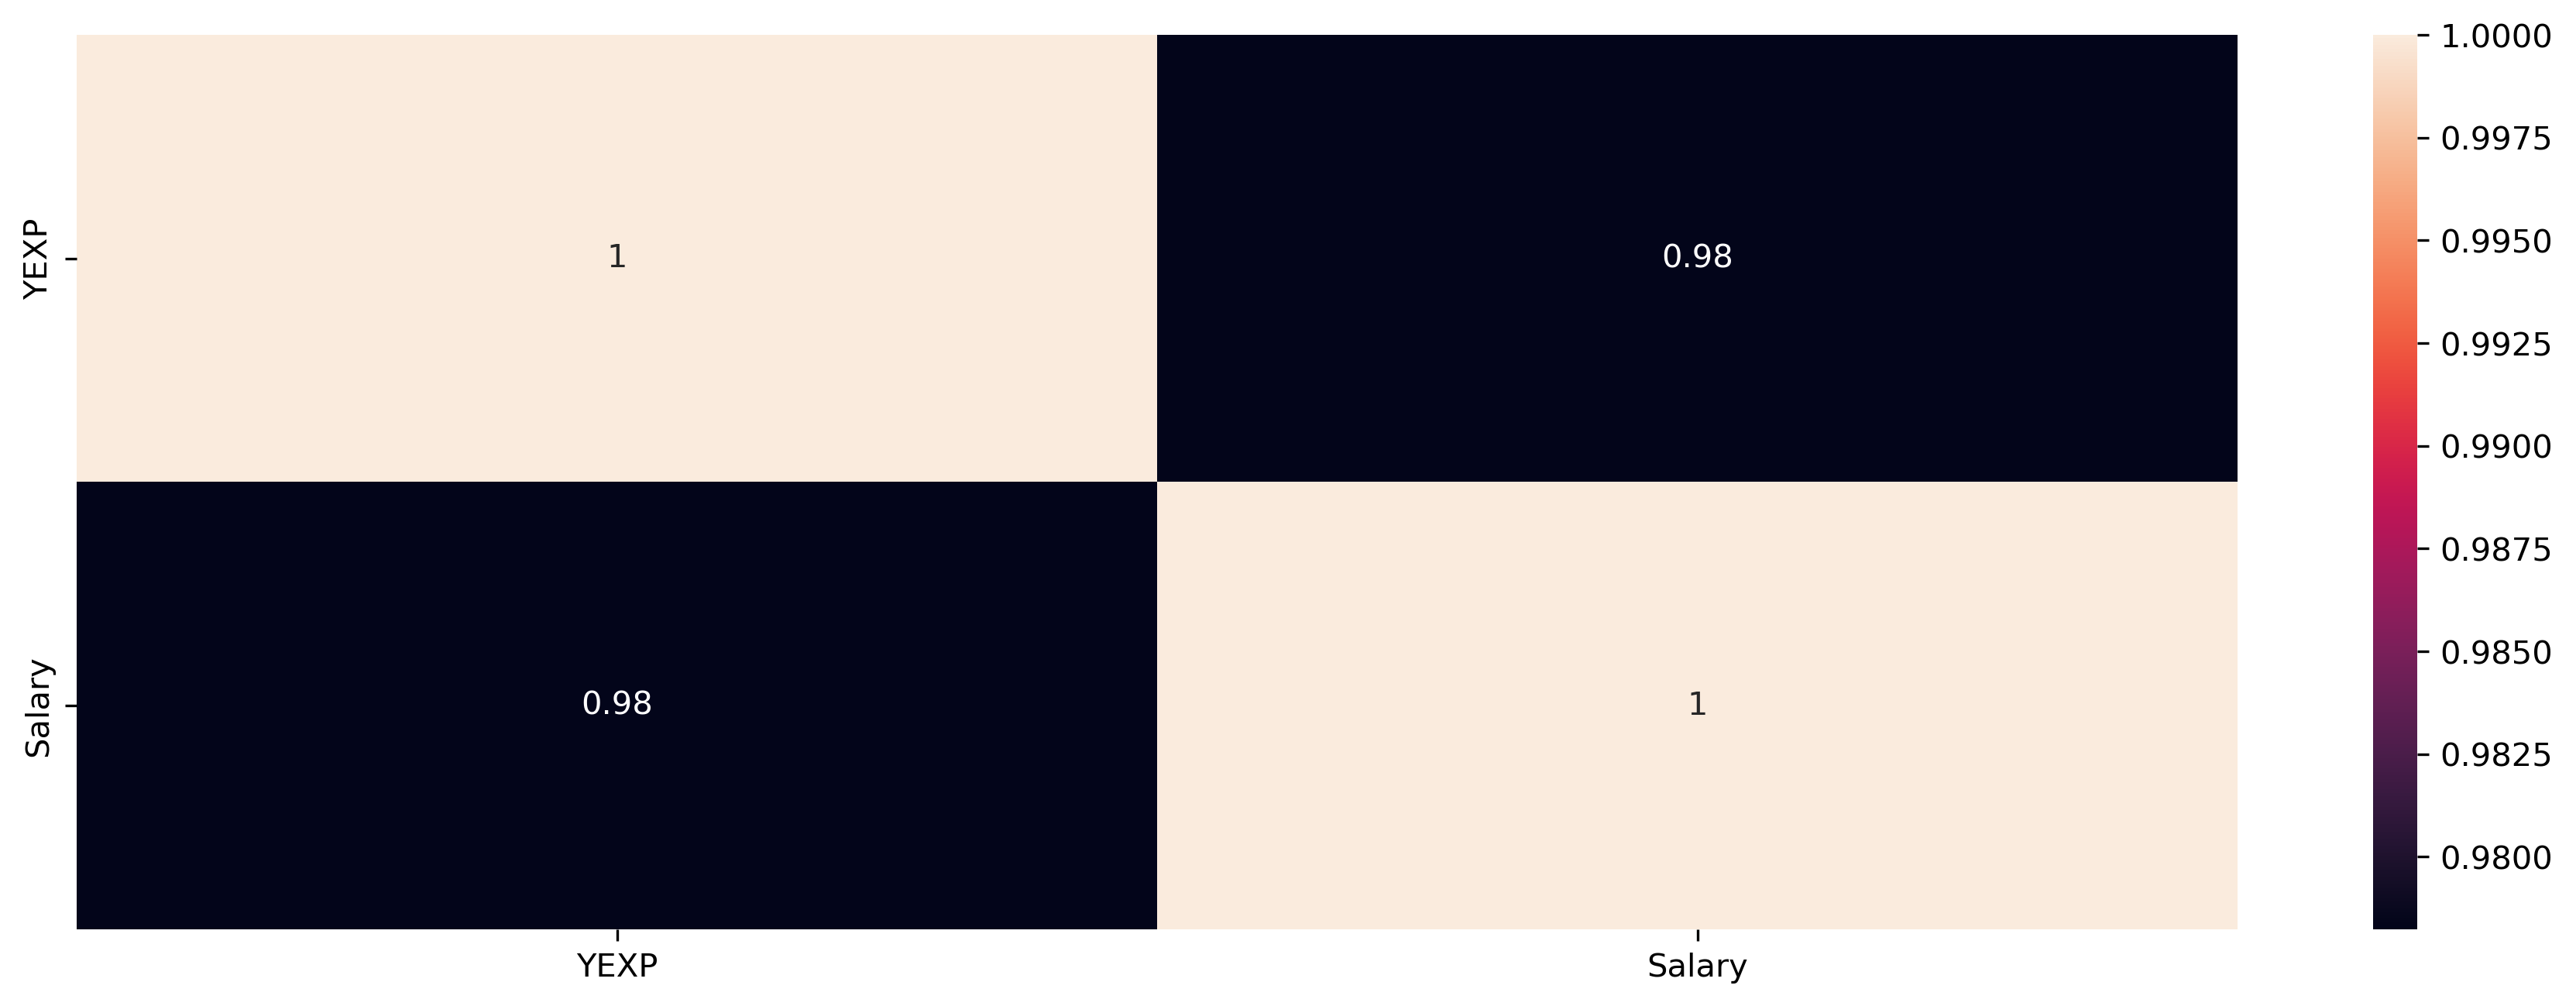

In [15]:
sns.heatmap(df.corr(),annot=True)

# MODEL BULDING

In [16]:
import statsmodels.formula.api as smf

In [17]:
model=smf.ols('Salary~YEXP',data=df).fit()

In [18]:
model.params

Intercept    25792.200199
YEXP          9449.962321
dtype: float64

In [19]:
model.pvalues

Intercept    5.511950e-12
YEXP         1.143068e-20
dtype: float64

In [20]:
model.rsquared

0.9569566641435086

In [21]:
model.rsquared_adj

0.9554194021486339

# Testing of model

In [22]:
test=pd.DataFrame({
    'YEXP':[1.1,2.0,3.2,4.1,5.6]
})
test

,YEXP
0,1.1
1,2.0
2,3.2
3,4.1
4,5.6


In [23]:
model.predict(test)

0    36187.158752
1    44692.124842
2    56032.079627
3    64537.045717
4    78711.989199
dtype: float64

# SECOND PROBLEM

In [24]:
dt=pd.read_csv('delivery_time.csv')
dt

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [25]:
dt.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [26]:
dt.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [27]:
dt.duplicated().sum()

0

In [28]:
dt.rename(columns={'Delivery Time':'DT','Sorting Time':'ST'},inplace=True)

<Axes: >

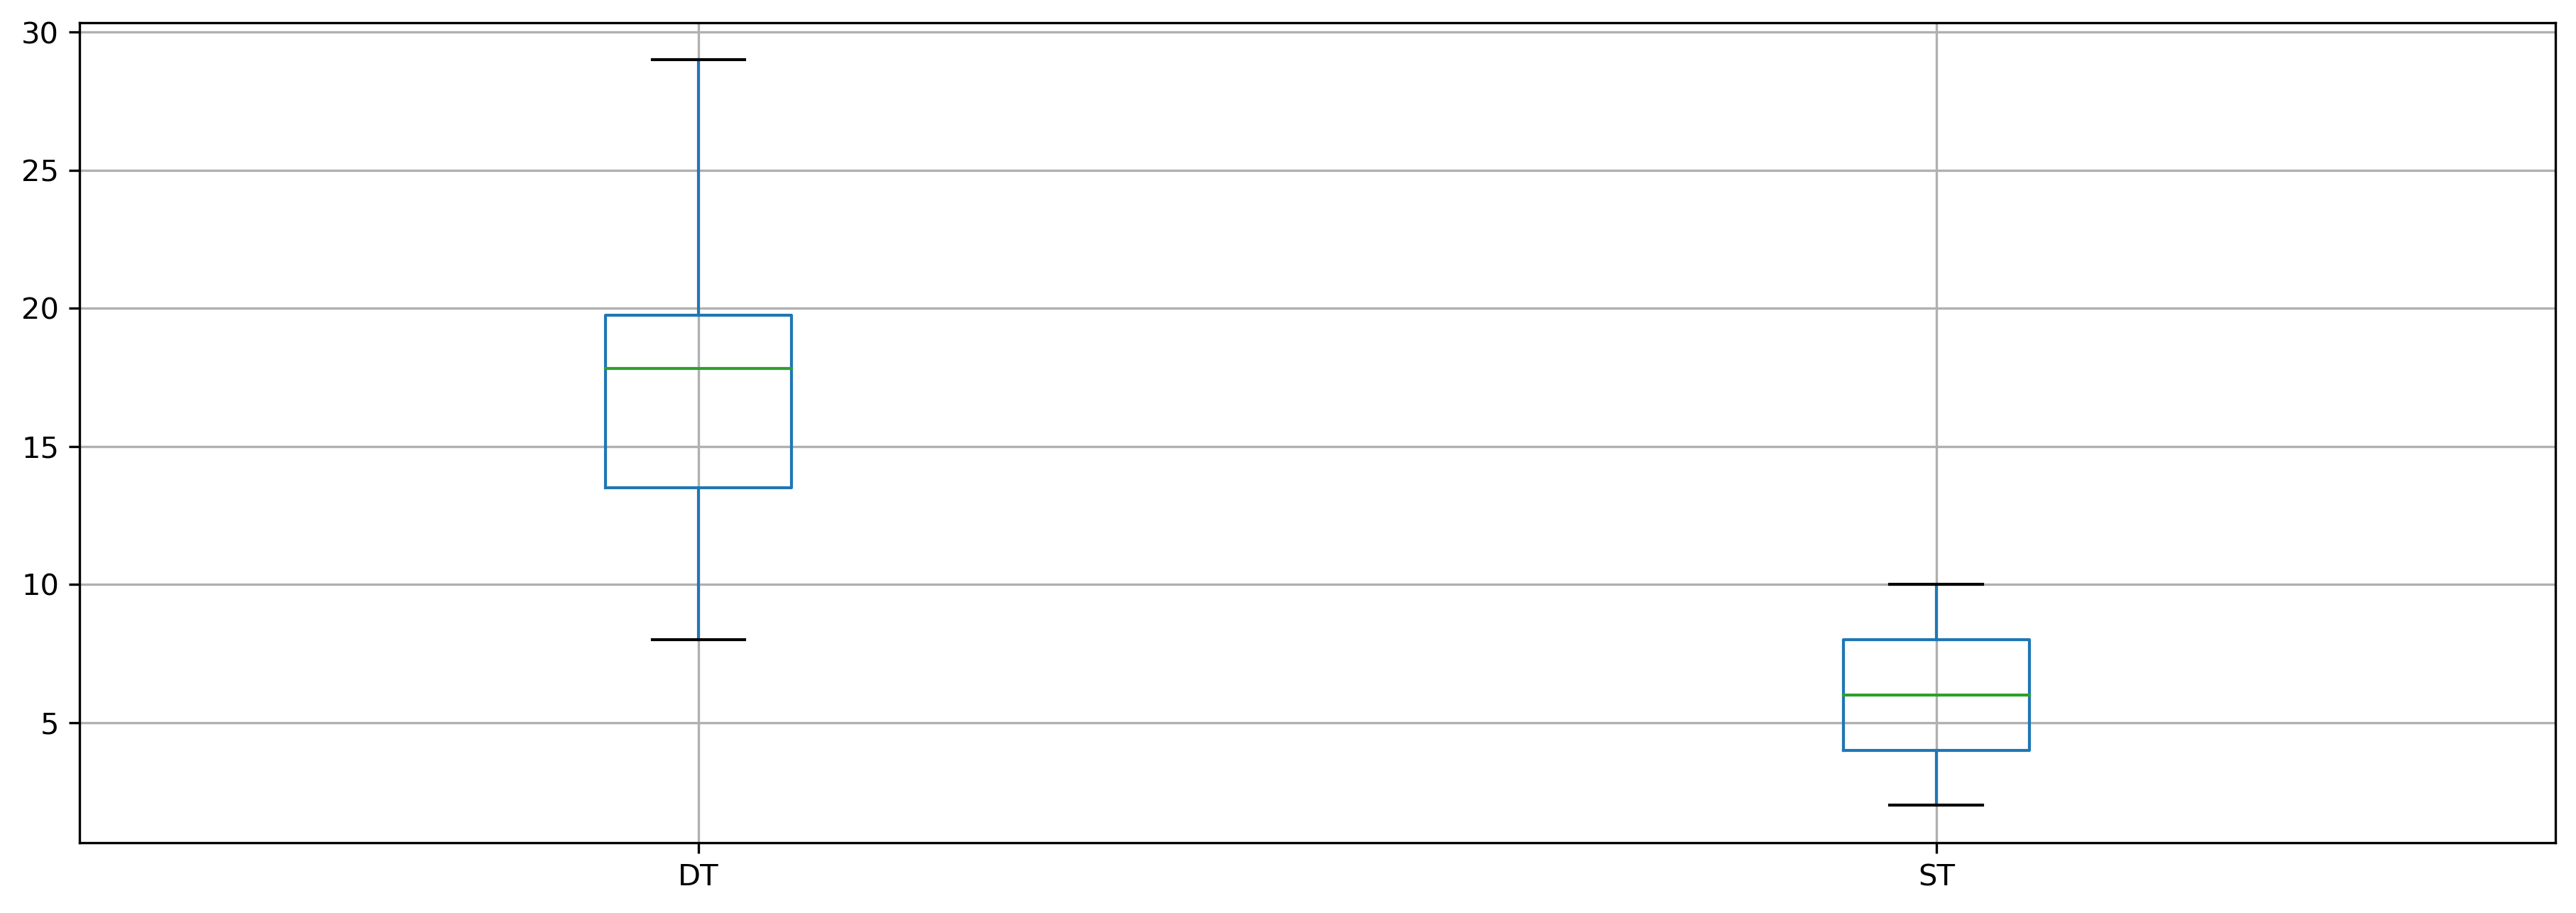

In [29]:
dt.boxplot()

# TRANFORMATION

In [30]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [31]:
sc=StandardScaler()

In [32]:
sc.fit_transform(dt)

array([[ 0.84986692,  1.53562462],
       [-0.66449036, -0.88298415],
       [ 0.59747404, -0.07678123],
       [ 1.45560983,  1.13252315],
       [ 2.46518134,  1.53562462],
       [-0.2909489 , -0.07678123],
       [ 0.44603831,  0.32632023],
       [-1.47214757, -1.28608562],
       [ 0.22393258,  1.53562462],
       [ 0.39555973,  1.13252315],
       [ 0.61362718,  0.72942169],
       [-1.21975469, -0.88298415],
       [-0.02240287,  0.32632023],
       [-1.06831896, -1.28608562],
       [-0.96130438, -1.28608562],
       [-0.38584862, -0.88298415],
       [-0.61401178, -0.07678123],
       [ 0.26633458,  0.32632023],
       [-1.77501902, -1.68918708],
       [ 0.20979858,  0.32632023],
       [ 0.95082407, -0.47988269]])

In [33]:
pd.DataFrame(sc.fit_transform(dt),columns=dt.columns)

,DT,ST
0,0.849867,1.535625
1,-0.664490,-0.882984
2,0.597474,-0.076781
3,1.455610,1.132523
4,2.465181,1.535625
5,-0.290949,-0.076781
6,0.446038,0.326320
7,-1.472148,-1.286086
8,0.223933,1.535625
9,0.395560,1.132523


In [34]:
mn=MinMaxScaler()

In [35]:
mn.fit_transform(dt)

array([[0.61904762, 1.        ],
       [0.26190476, 0.25      ],
       [0.55952381, 0.5       ],
       [0.76190476, 0.875     ],
       [1.        , 1.        ],
       [0.35      , 0.5       ],
       [0.52380952, 0.625     ],
       [0.07142857, 0.125     ],
       [0.47142857, 1.        ],
       [0.51190476, 0.875     ],
       [0.56333333, 0.75      ],
       [0.13095238, 0.25      ],
       [0.41333333, 0.625     ],
       [0.16666667, 0.125     ],
       [0.19190476, 0.125     ],
       [0.32761905, 0.25      ],
       [0.27380952, 0.5       ],
       [0.48142857, 0.625     ],
       [0.        , 0.        ],
       [0.46809524, 0.625     ],
       [0.64285714, 0.375     ]])

In [36]:
pd.DataFrame(mn.fit_transform(dt),columns=dt.columns)

,DT,ST
0,0.619048,1.000
1,0.261905,0.250
2,0.559524,0.500
3,0.761905,0.875
4,1.000000,1.000
5,0.350000,0.500
6,0.523810,0.625
7,0.071429,0.125
8,0.471429,1.000
9,0.511905,0.875


# LINEARITY

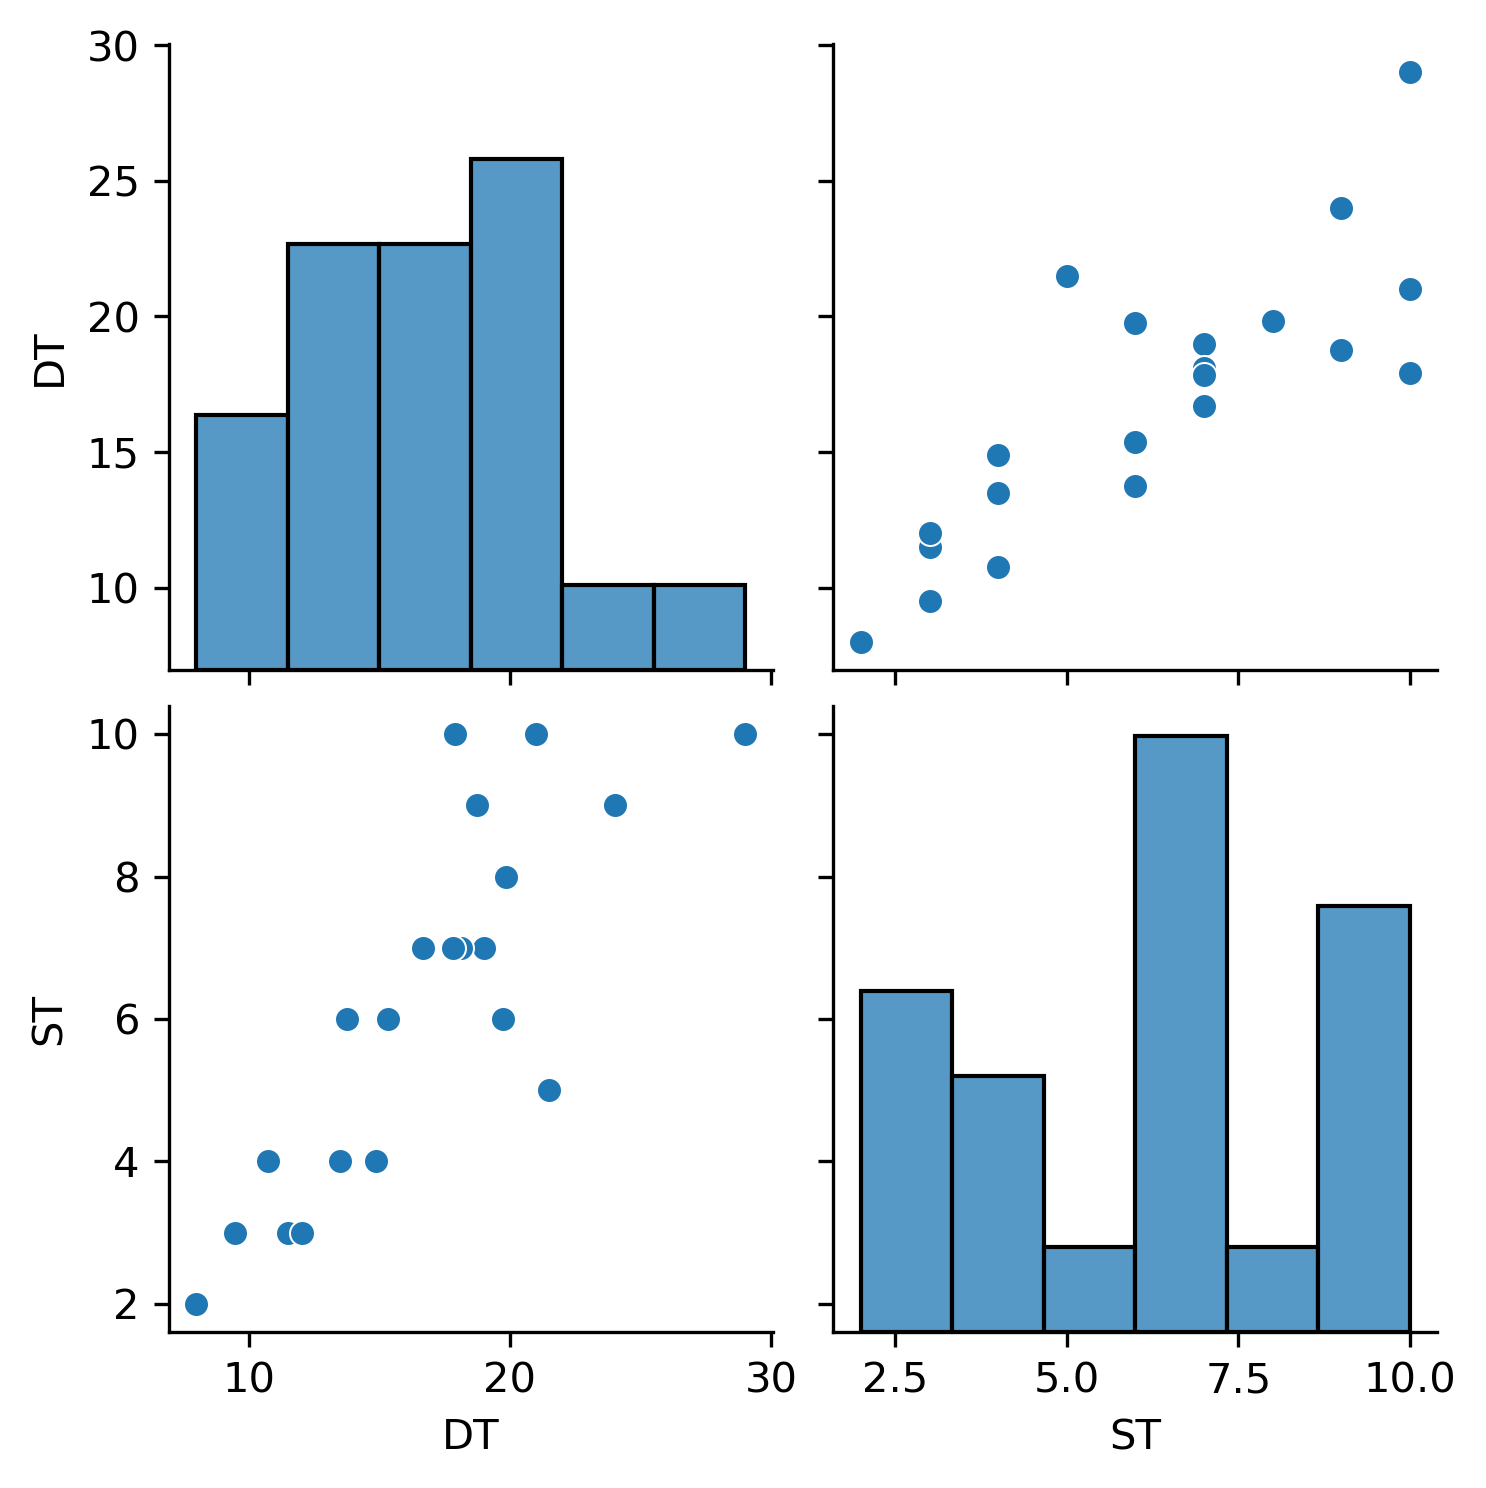

In [37]:
sns.pairplot(dt)

<Axes: >

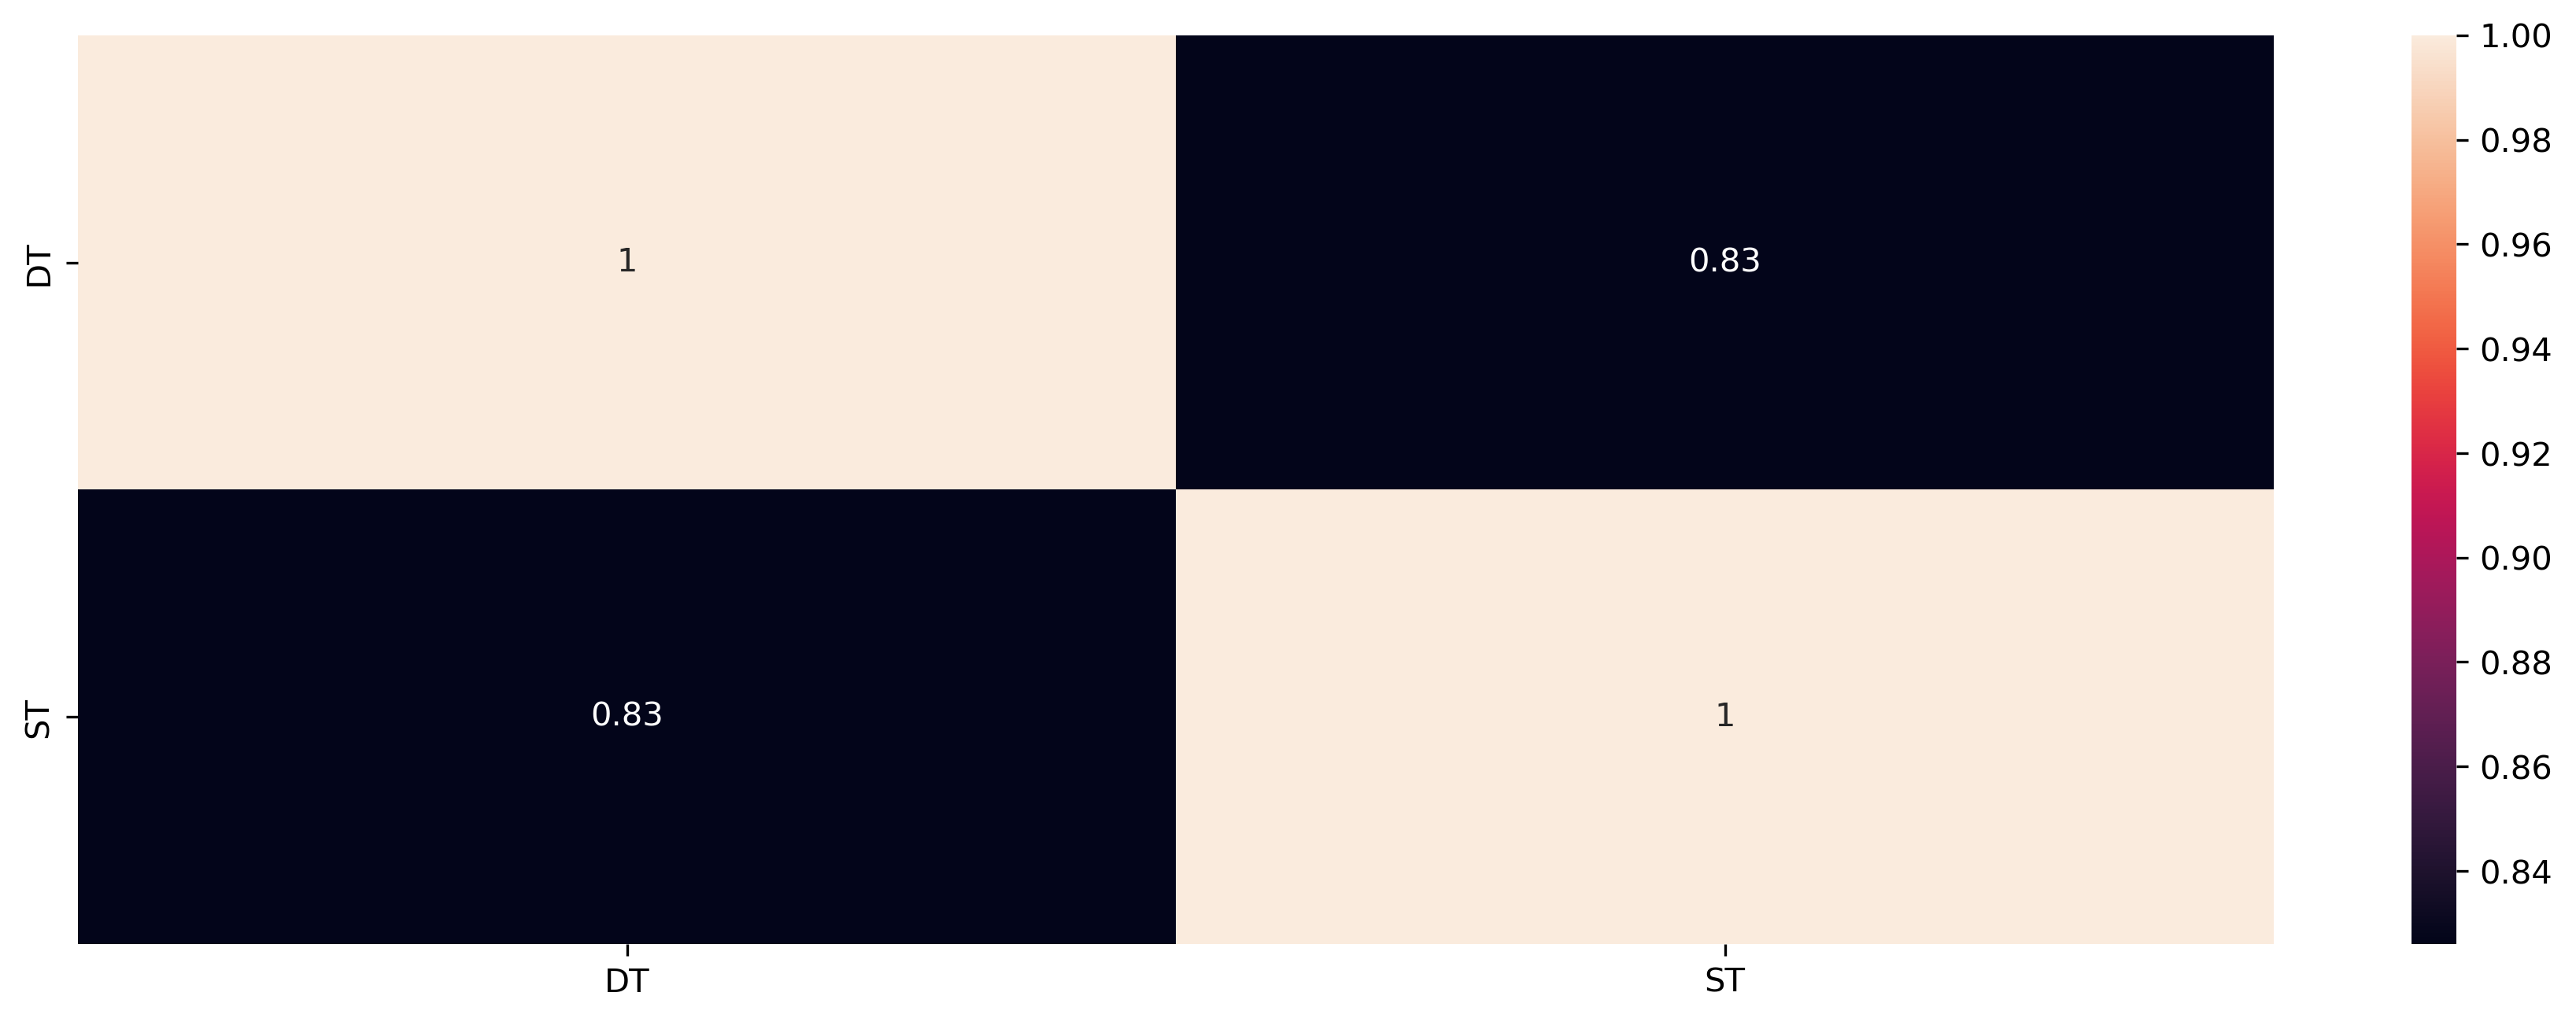

In [38]:
sns.heatmap(dt.corr(),annot=True)

# MODEL.BULDING

In [39]:
import statsmodels.formula.api as smf

In [40]:
model_2=smf.ols('DT~ST',data=dt).fit()
model_2

In [41]:
model_2.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [42]:
model_2.rsquared

0.6822714748417231

In [43]:
model_2.rsquared_adj

0.6655489208860244

# TESTING OF MODEL

In [44]:
test2=pd.DataFrame({
    'ST':[10,1,12,9]
})
test2

,ST
0,10
1,1
2,12
3,9


In [45]:
model_2.predict(test2)

0    23.072933
1     8.231754
2    26.370973
3    21.423913
dtype: float64